In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=12)

%config Inline.figure_formats = ['retina']

In [ ]:
poi = stats.poisson(mu=7)
data = poi.rvs(1000)

In [ ]:

with pm.Model() as model:
    mu = pm.HalfNormal('mu',sigma=10)
    pm.Poisson('Poission',mu=mu,observed = data)
    trace = pm.sample(5000)

In [ ]:
pm.traceplot(trace)

In [ ]:
norm1 = stats.norm(loc=3.0,scale=7.0)
data = norm1.rvs(2000)

In [ ]:

with pm.Model() as model:
    mu = pm.Uniform('mu', lower= 0.0, upper = 20)
    sigma = pm.HalfNormal('sigma',sigma=10)
    pm.Normal('Normal',mu=mu,sigma = sigma,observed = data)
    trace = pm.sample(5000)

In [ ]:
pm.traceplot(trace[:1000])

In [ ]:
trace['mu'].mean()

In [ ]:
# check spread of Binomial Distribution
x = np.linspace(0.0,1.0,100)
dist1 = stats.binom(n=10,p=x)

dist2 = stats.binom(p=.6,n=50)
s2 = dist2.pmf(x)
dist3 = stats.binom(p=.6,n=500)
s3 = dist3.pmf(x)
dist4 = stats.binom(p=.6,n=1000)
s4 = dist4.pmf(x)

In [ ]:
dist1 = stats.binom.pmf(n=10,p=x,k=6)

In [ ]:
dist2 = stats.binom.pmf(n=100,p=x,k=60)
dist3 = stats.binom.pmf(n=500,p=x,k=300)
dist4 = stats.binom.pmf(n=1000,p=x,k=600)

In [ ]:
plt.figure(figsize=(10,9))
plt.subplot(221)
plt.plot(dist1,label="10")
plt.legend()
plt.subplot(222)
plt.plot(dist2,label="100")
plt.legend()
plt.subplot(223)
plt.plot(dist3,label=500)
plt.legend()
plt.subplot(224)
plt.plot(dist4,label=1000)
plt.legend()
plt.show()

In [ ]:
# Linear Reg

alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [ ]:
plt.subplot(121)
plt.scatter(X1,Y)
plt.subplot(122)
plt.scatter(X2,Y)

In [ ]:
yb = Y>np.median(Y)
yb = yb*1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
with pm.Model() as model:
    alpha = pm.Normal('alpha',mu=0,sigma=10)
    betas = pm.Normal('betas',mu=0,sigma=10,shape=2)
    #sigma = pm.HalfNormal('sigma',sigma=5)
    
    z = alpha +betas[0]*X1 + betas[1]*X2 
    p = sigmoid(z)
    p_obs = pm.Binomial('p',p=p,n=len(yb),observed = yb)
    trace = pm.sample(15000)
    #map_estimate = pm.find_MAP(model=model,method='powell')

In [ ]:
pm.summary(trace[2000:]).round(2)

In [ ]:
pm.traceplot(trace[2000:])

In [ ]:
plt.hist(trace['sigma'],rwidth=.8)

### RandomWalk

In [ ]:

with pm.Model() as sp500_model:
    #nu = pm.Exponential('nu', 1/10., testval=5.)
    sigma = pm.Exponential('sigma', 1/0.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sigma=sigma, shape=2)
    trace = pm.sample(500)

In [ ]:
pm.traceplot(trace);

In [ ]:
plt.plot(trace['s'][:,1])

In [4]:
births = 987
fem_births = 437

In [5]:
with pm.Model() as model:
    p = pm.Uniform('p',lower=0.0,upper=1.0)
    y = pm.Binomial('y',n=births,p=p,observed = fem_births)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5926.49draws/s]
The acceptance probability does not match the target. It is 0.889389636342099, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8876135592358193, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1728f7198>,
      dtype=object)

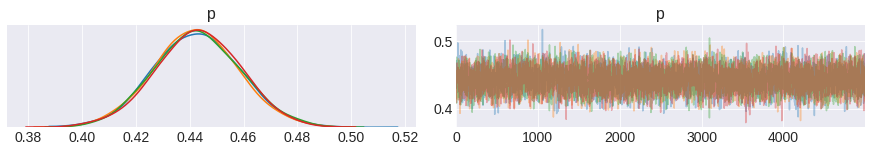

In [6]:
pm.traceplot(trace[5000:])

In [7]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.442752,0.015792,0.000129,0.411526,0.473592,16289.386835,1.000199


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa172908e10>],
      dtype=object)

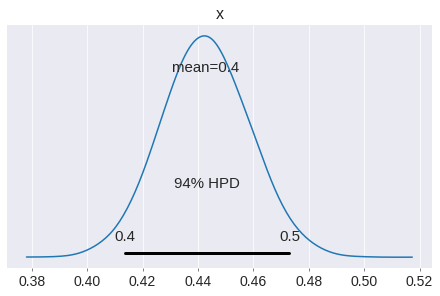

In [8]:
pm.plot_posterior(trace['p'])

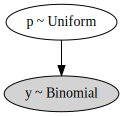

In [10]:
pm.model_to_graphviz(model)

In [18]:
numbs = "28 26 33 24 34 -44 27 16 40 -2 29 22 \
24 21 25 30 23 29 31 19 24 20 36 32 36 28 25 21 28 29 \
37 25 28 26 30 32 36 26 30 22 36 23 27 27 28 27 31 27 26 \
33 26 32 32 24 39 28 24 25 32 25 29 27 28 29 16 23"
num = numbs.split(" ")
numbs = list(map(int,num))

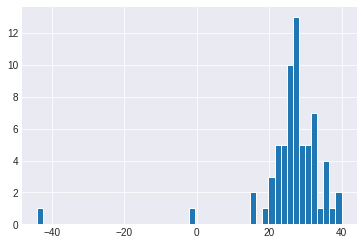

In [23]:
_,_,_=plt.hist(numbs,edgecolor='w',bins=50)

In [27]:
with pm.Model() as model_1:
    mu = pm.Uniform('mu', lower=10, upper=30)
    sigma = pm.Uniform('sigma', lower=0, upper=20)
    post = pm.Normal('post', mu=mu, sd=sigma, observed=numbs)
    trace_1 = pm.sample(draws=50_000, tune=50_000, nuts_kwargs={'target_accept':0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 400000/400000 [02:05<00:00, 3192.62draws/s]


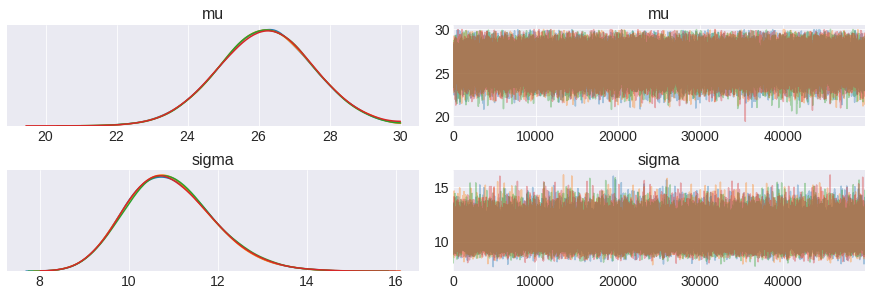

In [30]:
pm.traceplot(trace_1);

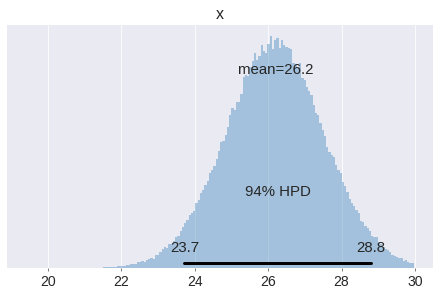

In [46]:
pm.plot_posterior(trace_1['mu'],kind='hist');

In [36]:
df = pm.summary(trace_1)
df.style.format('{:.4f}')

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,26.2049,1.3416,0.0039,23.5704,28.8582,97215.9618,1.0000
sigma,10.9549,0.9859,0.0030,9.0997,12.9140,100146.8162,1.0000


In [24]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [3]:

%watermark -iv -v -p theano,scipy,matplotlib -m

pymc3      3.7
scipy      1.3.0
numpy      1.16.4
matplotlib 3.1.0
CPython 3.6.7
IPython 7.5.0

theano 1.0.4
scipy 1.3.0
matplotlib 3.1.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-51-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
